In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('citrus.csv')

In [3]:
df

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [5]:
df.isnull().sum()

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

In [6]:
df.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


<AxesSubplot:>

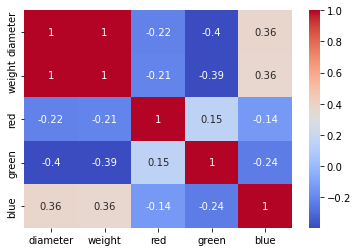

In [10]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

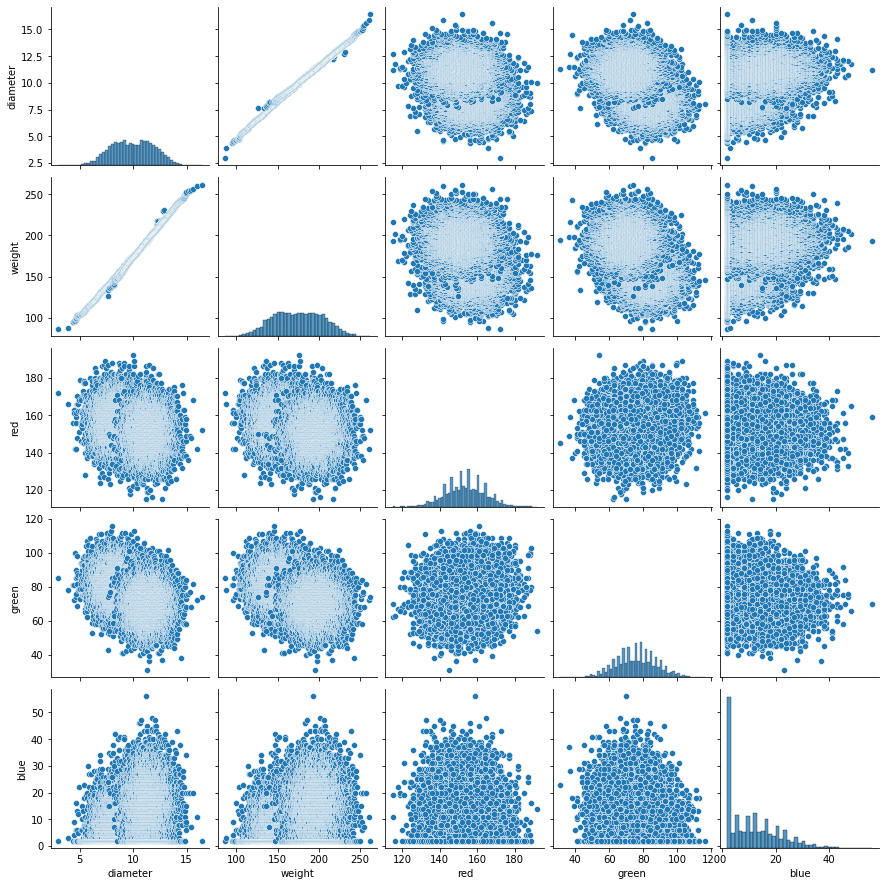

In [8]:
sns.pairplot(df)

In [13]:
df['orange']=pd.get_dummies(df['name'],drop_first=True,dtype=int)

In [14]:
df.drop('name',axis=1,inplace=True)

<AxesSubplot:xlabel='orange', ylabel='count'>

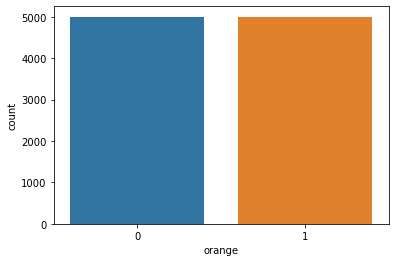

In [18]:
sns.countplot(data=df,x='orange')

In [19]:
X=df.drop('orange',axis=1)
y=df['orange']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=91)

In [22]:
from sklearn.svm import SVC

In [23]:
svc=SVC()

In [24]:
svc.fit(X_train,y_train)

SVC()

In [25]:
y_pred=svc.predict(X_test)

In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       959
           1       0.92      0.93      0.93      1041

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



In [28]:
pip install lazypredict

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [32]:
from lazypredict.Supervised import LazyClassifier

In [36]:
lc=LazyClassifier()

In [37]:
models,prediction=lc.fit(X_train,X_test,y_train,y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:13<00:00,  2.11it/s]

[LightGBM] [Info] Number of positive: 3959, number of negative: 4041
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 697
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494875 -> initscore=-0.020501
[LightGBM] [Info] Start training from score -0.020501


In [61]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.98,0.98,0.98,0.98,0.07
LGBMClassifier,0.98,0.98,0.98,0.98,0.08
QuadraticDiscriminantAnalysis,0.96,0.97,0.97,0.97,0.01
LinearDiscriminantAnalysis,0.96,0.96,0.96,0.96,0.03
RidgeClassifierCV,0.96,0.96,0.96,0.96,0.02
CalibratedClassifierCV,0.96,0.96,0.96,0.96,0.26
LinearSVC,0.96,0.96,0.96,0.96,0.05
SGDClassifier,0.96,0.96,0.96,0.96,0.02
PassiveAggressiveClassifier,0.95,0.95,0.95,0.95,0.03


In [56]:
from xgboost import XGBClassifier

bst = XGBClassifier(n_estimators=5, max_depth=25, learning_rate=1, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
preds = bst.predict(X_test)

In [57]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       959
           1       0.97      0.96      0.97      1041

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



In [63]:
import joblib
joblib.dump(bst,'citrus_pred.pkl')

['citrus_pred.pkl']